## Example Statcast baseball data API

For this example see [https://github.com/jldbc/pybaseball]

to install run

pip install pybaseball

In [ ]:
pip install pybaseball

In [1]:
# Find Vladimir Guerrero Jrs player id
from pybaseball import  playerid_lookup
from pybaseball import  statcast_pitcher, statcast_batter
playerid_lookup('guerrero', 'vladimir')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,guerrero,vladimir,665489,guerv002,guerrvl02,19611,2019.0,2023.0
1,guerrero,vladimir,115223,guerv001,guerrvl01,778,1996.0,2011.0


In [40]:
# His MLBAM ID is 665489 so we feed that as the player_id argument to the following function 
guerrero_stats = statcast_batter('2021-03-28', '2023-11-01', 665489)

print(type(guerrero_stats))
print(guerrero_stats.shape)
guerrero_stats.tail()

Gathering Player Data
<class 'pandas.core.frame.DataFrame'>
(7887, 92)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
7882,SL,2021-03-28,84.5,2.82,6.53,"Guerrero Jr., Vladimir",665489,669373,NaN,ball,...,1,1,1,1,1,Standard,Standard,271.0,0.000,NaN
7883,FS,2021-03-28,87.6,2.68,6.60,"Guerrero Jr., Vladimir",665489,669373,strikeout,swinging_strike,...,0,0,1,1,0,Infield shade,Standard,133.0,-0.009,NaN
7884,FC,2021-03-28,95.3,3.25,6.45,"Guerrero Jr., Vladimir",665489,669373,NaN,foul,...,0,0,1,1,0,Standard,Standard,155.0,0.000,NaN
7885,FF,2021-03-28,93.8,3.19,6.45,"Guerrero Jr., Vladimir",665489,669373,NaN,called_strike,...,0,0,1,1,0,Standard,Standard,144.0,0.000,NaN
7886,KC,2021-03-28,75.6,2.61,6.68,"Guerrero Jr., Vladimir",665489,669373,NaN,ball,...,0,0,1,1,0,Standard,Standard,334.0,0.000,NaN


## Look at what columns of data are available

In [41]:
guerrero_stats.columns  

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [56]:
guerrero_stats=guerrero_stats[guerrero_stats['game_type']=='R']

In [57]:
guerrero_stats.description.value_counts()

description
ball                       2585
hit_into_play              1528
foul                       1255
called_strike              1005
swinging_strike             824
blocked_ball                223
foul_tip                     70
swinging_strike_blocked      35
hit_by_pitch                 21
Name: count, dtype: int64

In [58]:
in_play = guerrero_stats[guerrero_stats['type'] == 'X']
in_play.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
34,CH,2023-09-30,83.1,0.31,6.44,"Guerrero Jr., Vladimir",665489,606965,field_out,hit_into_play,...,7,7,4,4,7,Infield shade,Standard,231.0,-0.043,-0.239
45,FC,2023-09-30,88.4,-0.85,6.16,"Guerrero Jr., Vladimir",665489,596112,field_out,hit_into_play,...,4,4,4,4,4,Standard,Standard,128.0,-0.020,-0.106
46,FC,2023-09-29,89.2,-2.70,5.36,"Guerrero Jr., Vladimir",665489,541640,double,hit_into_play,...,4,4,8,8,4,Standard,Standard,198.0,0.011,0.533
55,ST,2023-09-29,80.2,-0.90,6.08,"Guerrero Jr., Vladimir",665489,641793,single,hit_into_play,...,0,0,1,1,0,Infield shade,Standard,47.0,0.032,0.453
59,FF,2023-09-29,97.3,-1.43,6.14,"Guerrero Jr., Vladimir",665489,671737,double,hit_into_play,...,4,4,10,10,4,Standard,Standard,203.0,0.001,0.227


In [59]:
in_play['events'].value_counts()

events
field_out                    856
single                       321
home_run                     106
double                        94
grounded_into_double_play     69
force_out                     44
field_error                   14
sac_fly                       10
double_play                    5
fielders_choice                5
fielders_choice_out            2
triple_play                    1
triple                         1
Name: count, dtype: int64

In [60]:
guerrero_stats.game_year

27      2023
28      2023
29      2023
30      2023
31      2023
        ... 
7865    2021
7866    2021
7867    2021
7868    2021
7869    2021
Name: game_year, Length: 7546, dtype: int64

In [78]:
# get only 2021 data
stat='hit_distance_sc'
limit=380

def filter_stat(stat, lower_limit, upper_limit):
    num=[]
    for year in [2021, 2022, 2023]:
        temp = guerrero_stats[guerrero_stats['game_year'] == year]
        temp=temp[temp[stat]>lower_limit]
        temp=temp[temp[stat]<upper_limit]
        num_temp=temp[stat].count()
        num.append(num_temp)

    return(num)

def filter_2_stats(stat1, lower_limit1, upper_limit1, stat2, lower_limit2, upper_limit2):
    num=[]
    for year in [2021, 2022, 2023]:
        temp = guerrero_stats[guerrero_stats['game_year'] == year]
        temp=temp[temp[stat1]>lower_limit1]
        temp=temp[temp[stat1]<upper_limit1]
        temp=temp[temp[stat2]>lower_limit2]
        temp=temp[temp[stat2]<upper_limit2]
        num_temp=temp[stat].count()
        num.append(num_temp)

    return(num)
'''
num=[]
for year in [2021, 2022, 2023]:
    temp = guerrero_stats[guerrero_stats['game_year'] == year]
    hr_temp=temp[temp['events']=='home_run'][stat].count()
    hr.append(hr_temp)
    num_temp=temp[temp[stat]>limit][stat].count()
    num.append(num_temp)
    speed_temp=temp[temp[stat]>limit][stat].count()


print(num)
print(hr)
'''

print('distance ',filter_stat(stat, 380, 500))
print('launch angle', filter_stat('launch_angle', 18, 35))
print('launch speed', filter_stat('launch_speed', 102, 120))
print('launch speed, launch angle', filter_2_stats('launch_speed', 102, 120, 'launch_angle', 18, 35))


distance  [51, 36, 29]
launch angle [148, 149, 143]
launch speed [200, 199, 169]
launch speed, launch angle [49, 31, 29]


In [18]:
# get the hit distance 
hit_distance=in_play['hit_distance_sc']
# sort the values in descending order
sorted=hit_distance.sort_values(ascending=False)
# print top 5 values
sorted.head()

5195    467.0
7240    465.0
7124    461.0
7654    456.0
6883    451.0
Name: hit_distance_sc, dtype: float64

<Axes: xlabel='launch_speed', ylabel='hit_distance_sc'>

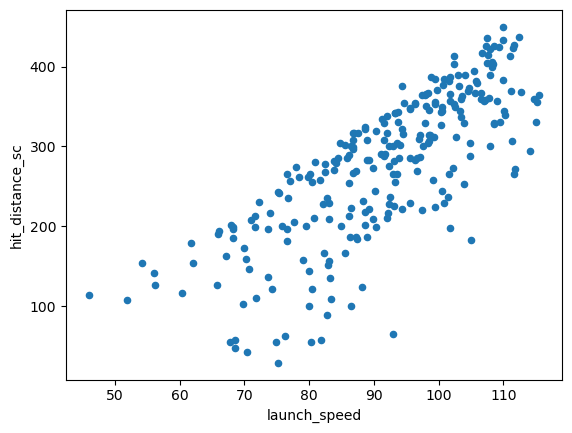

In [10]:
in_play[in_play['launch_angle']>10].plot.scatter('launch_speed', 'hit_distance_sc')

In [28]:
list_of_columns = ['game_date', 'launch_speed', 'launch_angle', 'hit_distance_sc']

display(in_play[list_of_columns].head())
print('hello')

,game_date,launch_speed,launch_angle,hit_distance_sc
7,2023-10-04,82.3,63.0,166.0
10,2023-10-04,92.1,31.0,317.0
11,2023-10-04,105.4,18.0,394.0
16,2023-10-03,98.5,42.0,307.0
19,2023-10-03,99.8,29.0,371.0


hello
